### Q1

In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt
# np.random.seed(0)
# random.seed(0)

In [23]:
def gen_rand():
    return random.random()

## bandit1
def banditA(action):
    p = [0.1, 0.2]
    if gen_rand() < p[action]:
        return 1
    else:
        return 0
## bandit2
def banditB(action):
    p = [0.8, 0.9]
    if random.random() < p[action]:
        return 1
    else:
        return 0

#### two action for each bandit and there are two bandit with different probability of selecting each action

In [24]:
def eGreedy(myBandit, epsilon, max_iter):
    Q = [0]*2
    count = [0]*2
    r = 0
    R = []
    R_avg = [0]*1
    for iter in range(1,max_iter):
        if random.random() > epsilon:
            action = Q.index(max(Q))
        else:
            action = random.choice([0,1])
        r = myBandit(action)
        R.append(r)
        count[action] = count[action]+1
        Q[action] = Q[action]+(r - Q[action])/count[action]
        R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)

    return Q, R_avg, R

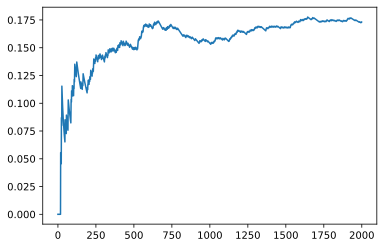

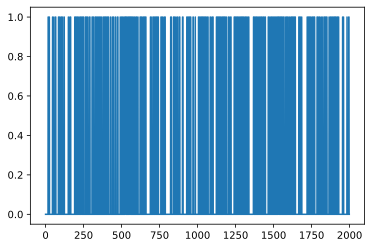

In [25]:
Q, R_avg, R = eGreedy(banditA, 0.2, 2000)
plt.plot(R_avg)
plt.show()
plt.plot(R)
plt.show()

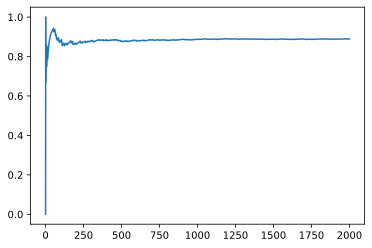

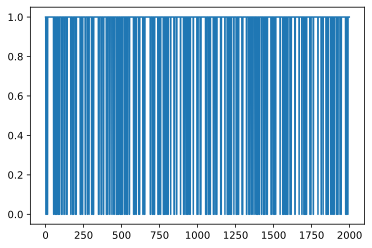

In [26]:
Q, R_avg, R = eGreedy(banditB, 0.2, 2000)
plt.plot(R_avg)
plt.show()
plt.plot(R)
plt.show()

### Q2

In [97]:
def bandit_nonstat(action, mean_reward): 
    mean_reward = mean_reward + np.random.normal(0,0.01,10) 
    r = mean_reward[action]
    return r, mean_reward

def eGreedy(N, epsilon, max_iter):
    Q = [0]*N
    count = [0]*N
    r = 0
    R = []
    R_avg = [0]*1
    action_list = []
    mean_reward = np.ones(10)
    actions = np.arange(10)
    for iter in range(1,max_iter):
        if random.random() > epsilon:
            action = Q.index(max(Q))
        else:
            action = random.choice(actions)
        r, mean_reward = bandit_nonstat(action, mean_reward)
        R.append(r)
        action_list.append(action)
        count[action] = count[action]+1
        Q[action] = Q[action]+(r - Q[action])/count[action]   ## Q value update
        R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)
    return Q, R_avg, R, action_list

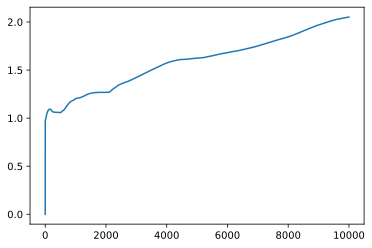

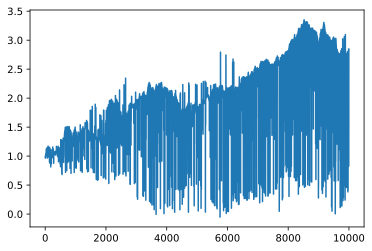

In [98]:
Q, R_avg, R, action_list = eGreedy(10, 0.1, 10000)
plt.figure()
plt.plot(R_avg) ### plot of expected reward vs iteration
plt.show()
plt.plot(R)  ### plot of each reward vs over iteration
plt.show()

### Q3

In [99]:
def modified_eGreedy(N, alpha, epsilon ,max_iter):
    Q = [0]*N
    count = [0]*N
    r = 0
    R = []
    R_avg = [0]*1
    action_list = []
    actions = np.arange(10)
    mean_reward = np.ones(10)
    for iter in range(1,max_iter):
        if random.random() > epsilon:
            action = Q.index(max(Q))
        else:
            action = random.choice(actions)
        r, mean_reward = bandit_nonstat(action, mean_reward)
        R.append(r)
        action_list.append(action)
        count[action] = count[action]+1 
        Q[action] = Q[action]+ alpha * (r - Q[action])  # modified Q-value update
        R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)
    return Q, R_avg, R, action_list

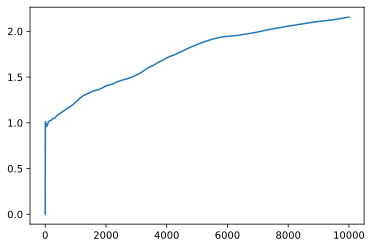

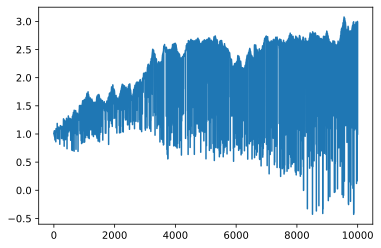

In [100]:
Q_mod, R_avg_mod, R_mod, action_list_mod = modified_eGreedy(10,0.6,0.1,10000)
plt.figure()
plt.plot(R_avg_mod) ### plot of expected reward vs iteration
plt.show()
plt.plot(R_mod)  ### plot of each reward vs over iteration
plt.show()

##### histogram for e-greedy algo - ( action)
Q[action] = Q[action] + (r - Q[action]) / count[action]

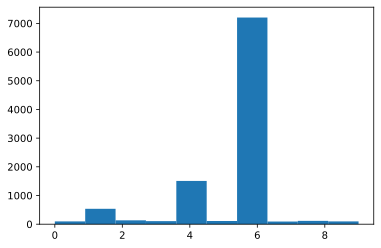

In [101]:
plt.hist(action_list)
plt.show()

##### histogram for modified e-greedy algo - (action)

Q[action] = Q[action] + alpha * (r - Q[action])

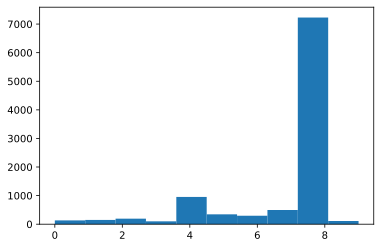

In [102]:
plt.hist(action_list_mod)
plt.show()